In [2]:
# Kütüphaneler

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore" , category=DeprecationWarning)
warnings.filterwarnings("ignore" , category=FutureWarning)

In [3]:
# Veri setimiz (Amerika'daki bazı suç istatistiklerini ifade ediyor.)

df = pd.read_csv("USArrests.csv" , index_col=0)
df.head()

# Amacımız bu eyaletleri segmentlere ayırmak

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


# VERİ SETİNİ TANIMA

In [4]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

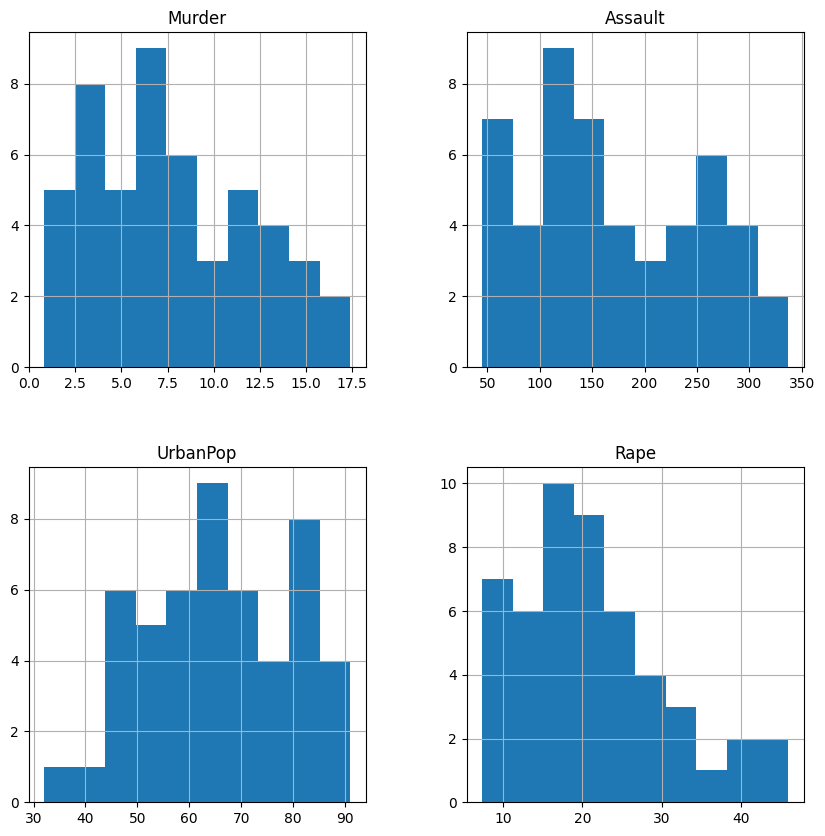

In [7]:
df.hist(figsize=(10,10))

# MODEL

In [8]:
kmeans = KMeans(n_clusters=4).fit(df)

In [9]:
#Kaç adet küme merkezi var

kmeans.n_clusters

4

In [10]:
# Küme merkezleri

kmeans.cluster_centers_

array([[  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [11]:
# Gözlemlerin hangi kümeye ait olduğu bilgisi

kmeans.labels_

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 2, 1,
       0, 1, 2, 3, 3, 1, 0, 2, 1, 1, 1, 0, 3, 2, 2, 3, 2, 1, 0, 2, 2, 3,
       0, 2, 2, 0, 0, 2])

# KÜMELERİN GÖRSELLEŞTİRİLMESİ

In [12]:
# 2 kümeye ayıran model oluşturduk

k_means = KMeans(n_clusters=2).fit(df)

In [13]:
kümeler = k_means.labels_
kümeler

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

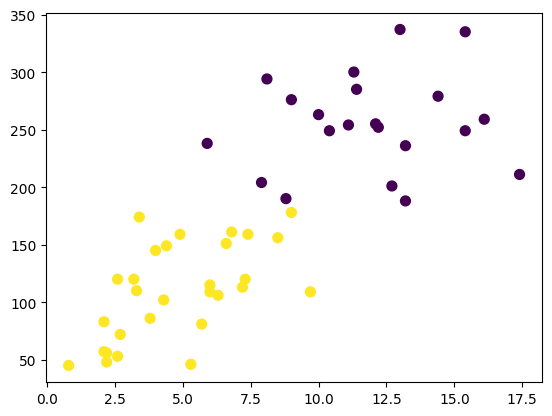

In [14]:
# 2 kümeye ayırdığımız yeni modelimizin görselleştirilmesi

plt.scatter(df.iloc[: , 0] , df.iloc[: , 1] , c=kümeler , s=50 , cmap="viridis");

In [15]:
merkezler = k_means.cluster_centers_
merkezler

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

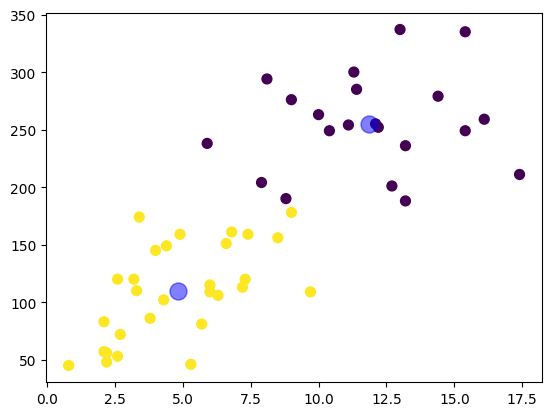

In [16]:
# Küme merkezlerinin görselleştirilmesi

plt.scatter(df.iloc[: , 0] , df.iloc[: , 1] , c=kümeler , s=50 , cmap="viridis")
plt.scatter(merkezler[: , 0] , merkezler[: , 1] , c="blue" , s=150 , alpha=0.5)    # alpha -> saydamlık parametresi
                                                                                    # c -> color
                                                                                    # s -> size

# OPTİMUM KÜME SAYISININ BELİRLENMESİ

<h2 style="color: green ">ELBOW YÖNTEMİ</h2>

In [17]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [18]:
# Uzaklık farklarının karelerinin toplamı

ssd = []

K = range(1,30)

# Farklı K değerlerine karşılık merkeze olan uzaklıklarını inceleyeceğiz
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Optimum Küme Sayısı İçin Elbow Yöntemi')

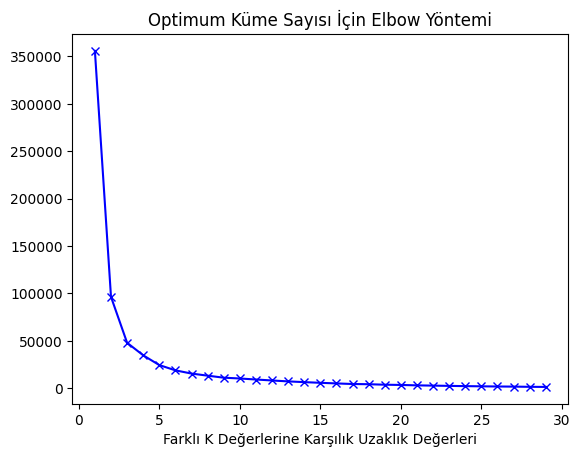

In [19]:
# Üstte yaptığımız işlemi görselleştirelim

plt.plot(K , ssd , "bx-")   # "bx-" -> çizgi üzerindeki x'leri oluşturan parametre
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Değerleri")
plt.title("Optimum Küme Sayısı İçin Elbow Yöntemi")

# Bu görseli incelediğimizde burada asıl amacımız dirsek dediğmiz yani kırılımın en sert olduğu noktaya karar vermek
# Bu veri seti için optimum k 2,3 olabilir.

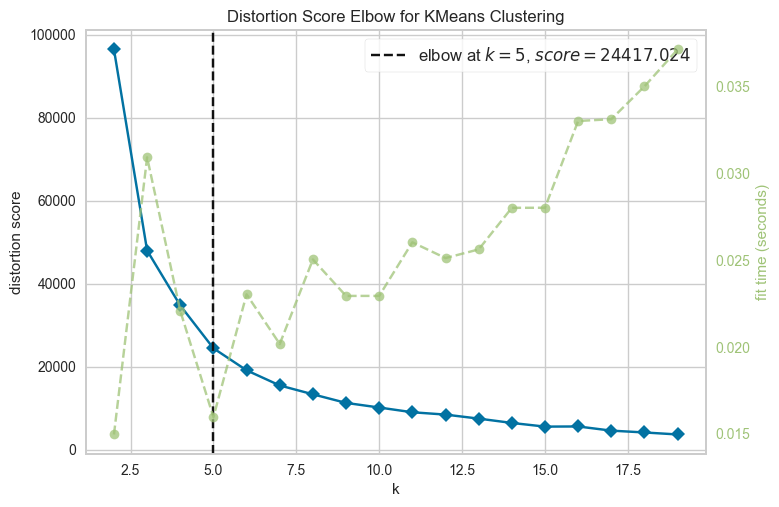

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# Elbow yöntemi için bunu da yapabilirdik

# !pip install yellowbrick

from yellowbrick.cluster import KElbowVisualizer


kmeans = KMeans()
visu = KElbowVisualizer(kmeans , k=(2,20)).fit(df)
visu.poof()


# Bu şekilde elimizle yaptığımız işlemi otomatik olarak yaptık ve optimum k değerini bize sağ üstte belirtti

# MODEL TUNING (DOĞRULAMA)

In [27]:
# Final modelimiz

kmeans = KMeans(n_clusters=5).fit(df)

In [28]:
# Sonucu görmek için bir df oluşturduk

kümeler = kmeans.labels_

pd.DataFrame({"Eyaletler" : df.index  , "Kümeler": kümeler})

,Eyaletler,Kümeler
0,Alabama,0
1,Alaska,0
2,Arizona,4
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,4
9,Georgia,2


In [30]:
# ÜStte oluşturduğumuzu ana veri setimize bir sütun olarak ekleyelim
df["Küme_No"] = kümeler
df

,Murder,Assault,UrbanPop,Rape,Küme_No
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,4
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,4
Georgia,17.4,211,60,25.8,2
